In [4]:
import csv

def remove_duplicates(input_file, output_file):
    # Set to store unique rows
    unique_rows = set()
    header = []

    # Read input CSV file and collect unique rows
    with open(input_file, 'r', newline='') as infile:
        reader = csv.reader(infile)
        header = next(reader)  # Read header
        for row in reader:
            # Convert row to tuple to make it hashable
            row_tuple = tuple(row)
            unique_rows.add(row_tuple)

    # Write unique rows to output CSV file
    with open(output_file, 'w', newline='') as outfile:
        writer = csv.writer(outfile)
        # Write header
        writer.writerow(header)
        for row_tuple in unique_rows:
            writer.writerow(row_tuple)

# Usage example
remove_duplicates('dataset.csv', 'dataset_without_duplicates.csv')
print("Duplicates removed from the CSV file with headers.")



Duplicates removed from the CSV file with headers.


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd

# Load your dataset (replace 'data.csv' with your file path)
data = pd.read_csv('dataset_without_duplicates.csv')

# Display the first few rows of the DataFrame
print("Top lines of the DataFrame:")
print(data.head())

# Get the column names
column_names = data.columns
print("\nColumn names:")
print(column_names)


Top lines of the DataFrame:
   sentence_length  punctuation_1  punctuation_2  punctuation_3  \
0         0.792308              1       0.978723       0.932766   
1         0.917347              1       1.000000       0.958418   
2         0.951455              1       1.000000       0.991453   
3         0.964899              1       1.000000       0.775000   
4         0.948413              1       1.000000       1.000000   

   punctuation_4  punctuation_5  punctuation_6  punctuation_7  punctuation_8  \
0              1            1.0            1.0       1.000000            1.0   
1              1            1.0            1.0       1.000000            1.0   
2              1            1.0            1.0       1.000000            1.0   
3              1            1.0            1.0       1.000000            1.0   
4              1            1.0            1.0       0.983333            1.0   

   punctuation_9  ...  function_word_now  ngram_transition_num_nodes  \
0       1.000000

In [3]:
import pandas as pd

# Load your dataset (replace 'dataset_without_duplicates.csv' with your file path)
data = pd.read_csv('dataset_without_duplicates.csv')

# Separate features and target variable
X = data.drop('Label', axis=1)  # Features
y = data['Label']  # Target variable

# Calculate the variance of each feature
variance = X.var()

# Set a threshold for variance (adjust as needed)
threshold = 0.005

# Identify features with variance below the threshold
low_variance_features = variance[variance < threshold].index.tolist()

# Print the low variance features
print("Features with low variance:")
print(low_variance_features)

# Drop features with low variance from the dataset
X_filtered = X.drop(columns=low_variance_features)

# Print the remaining features
print("\nRemaining features:")
print(X_filtered.columns)


Features with low variance:
['punctuation_1', 'punctuation_2', 'punctuation_4', 'punctuation_5', 'punctuation_6', 'punctuation_7', 'punctuation_8', 'punctuation_9', 'punctuation_11', 'punctuation_12', 'punctuation_14', 'punctuation_15', 'punctuation_16', 'punctuation_17', 'punctuation_18', 'punctuation_19', 'punctuation_20', 'punctuation_21', 'punctuation_22', 'punctuation_24', 'punctuation_25', 'punctuation_26', 'punctuation_27', 'punctuation_28', 'punctuation_30', 'punctuation_31', 'pos_tag_CC', 'pos_tag_CD', 'pos_tag_DT', 'pos_tag_EX', 'pos_tag_FW', 'pos_tag_IN', 'pos_tag_JJ', 'pos_tag_JJR', 'pos_tag_JJS', 'pos_tag_LS', 'pos_tag_MD', 'pos_tag_NN', 'pos_tag_NNS', 'pos_tag_NNP', 'pos_tag_NNPS', 'pos_tag_PDT', 'pos_tag_POS', 'pos_tag_PRP', 'pos_tag_PRP$', 'pos_tag_RB', 'pos_tag_RBR', 'pos_tag_RBS', 'pos_tag_RP', 'pos_tag_SYM', 'pos_tag_TO', 'pos_tag_UH', 'pos_tag_VB', 'pos_tag_VBD', 'pos_tag_VBG', 'pos_tag_VBN', 'pos_tag_VBP', 'pos_tag_VBZ', 'pos_tag_WDT', 'pos_tag_WP', 'pos_tag_WP$', 

In [4]:
import pandas as pd

# Load your dataset (replace 'dataset_without_duplicates.csv' with your file path)
data = pd.read_csv('dataset_without_duplicates.csv')

# Calculate the number of instances with label 1 and label 0
label_counts = data['Label'].value_counts()

# Print the counts
print("Number of instances with label 1:", label_counts[1])
print("Number of instances with label 0:", label_counts[0])


Number of instances with label 1: 422
Number of instances with label 0: 459


In [5]:
import pandas as pd

# Load your dataset (replace 'dataset_without_duplicates.csv' with your file path)
data = pd.read_csv('dataset_without_duplicates.csv')

# Separate instances with label 1 and label 0
label_1_data = data[data['Label'] == 1]
label_0_data = data[data['Label'] == 0]

# Undersample the majority class to match the number of instances in the minority class
num_instances_to_keep = min(len(label_1_data), len(label_0_data))
balanced_data = pd.concat([label_1_data.sample(n=num_instances_to_keep, random_state=42),
                           label_0_data.sample(n=num_instances_to_keep, random_state=42)])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the new counts
print("New number of instances with label 1:", len(balanced_data[balanced_data['Label'] == 1]))
print("New number of instances with label 0:", len(balanced_data[balanced_data['Label'] == 0]))


New number of instances with label 1: 422
New number of instances with label 0: 422


In [6]:
import pickle
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
X = balanced_data.drop('Label', axis=1)  # Features
y = balanced_data['Label']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate the variance of each feature
variance = X.var()

# Set the threshold for variance
threshold = 0.005  # Adjust as needed

# Initialize the VarianceThreshold selector
selector = VarianceThreshold(threshold)

# Fit the selector to the features
selector.fit(X_train)

# Get the indices of features with high variance
high_variance_indices = selector.get_support(indices=True)

# Filter the features based on high variance
X_train_filtered = X_train.iloc[:, high_variance_indices]
X_test_filtered = X_test.iloc[:, high_variance_indices]

# Train the RandomForestClassifier on the filtered features
clf_filtered = RandomForestClassifier(n_estimators=110, random_state=42)
clf_filtered.fit(X_train_filtered, y_train)

# Make predictions on the filtered test set
y_pred_proba_filtered = clf_filtered.predict_proba(X_test_filtered)
y_pred_filtered = clf_filtered.predict(X_test_filtered)
# Generate classification report
report = classification_report(y_test, y_pred_filtered)

# Save the model, predictions, and related information to a pickle file
model_info = {
    'model': clf_filtered,
    'X_test_filtered': X_test_filtered,
    'y_test': y_test,
    'y_pred_filtered': y_pred_filtered,
    'y_pred_proba_filtered': y_pred_proba_filtered
}

with open('random_forest_model.pickle', 'wb') as f:
    pickle.dump(model_info, f)


In [7]:
print(report)

              precision    recall  f1-score   support

           0       0.71      0.72      0.71        88
           1       0.69      0.68      0.68        81

    accuracy                           0.70       169
   macro avg       0.70      0.70      0.70       169
weighted avg       0.70      0.70      0.70       169



Confusion Matrix:
[[63 25]
 [26 55]]


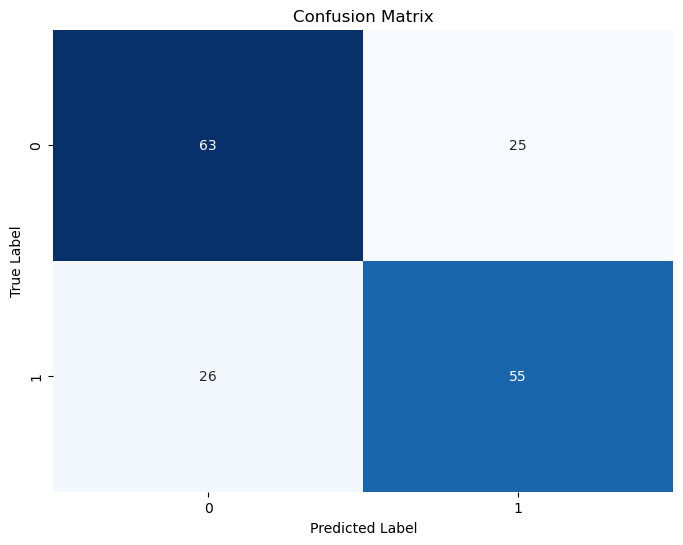

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_filtered)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
